In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


So by taking a look at the above data frame i can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem

In [14]:
df.shape

(1599, 12)

There are total 1599 rows and 12 columns

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null value in datasheet

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we found there is no null value present in dataframe

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As per observation:

1) There is big gap between 75% and max value of residual sugar column
2) There is big gap between 75% and max value of free sulfer dioxide column
3) There is big gap between 75% and max value of total sulfer dioxide column
    

In [18]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

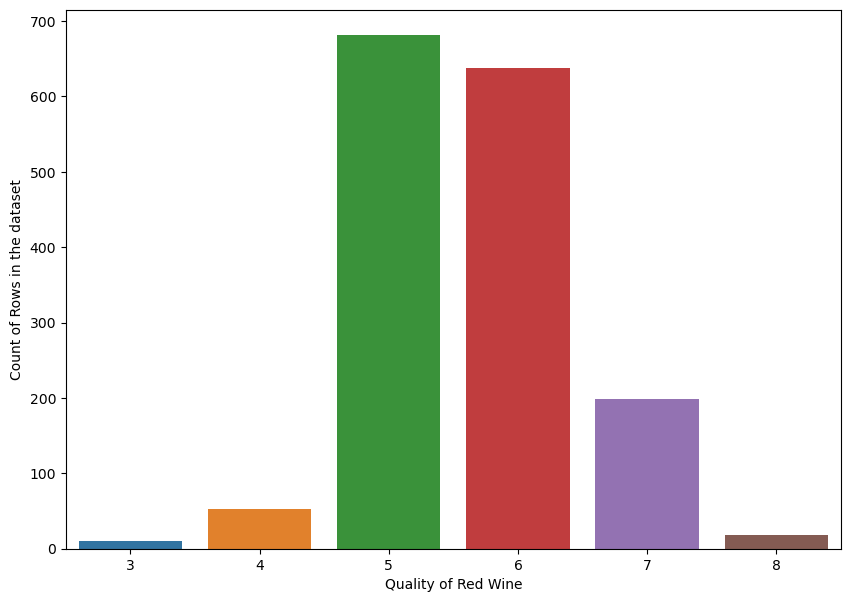

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

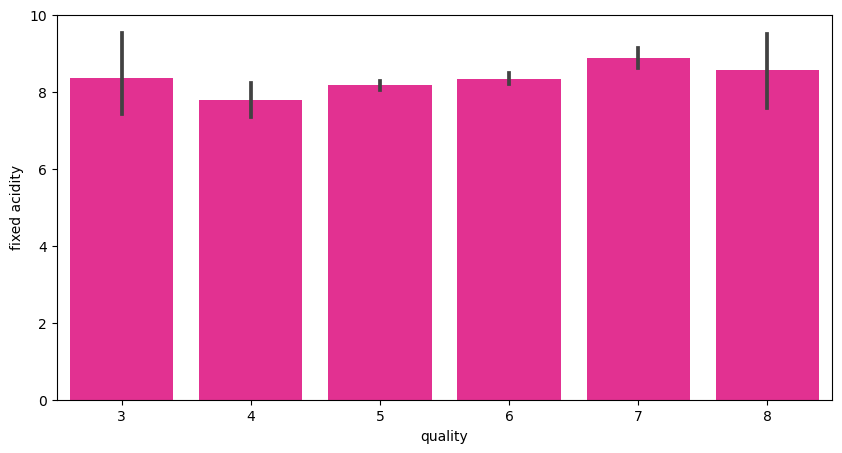

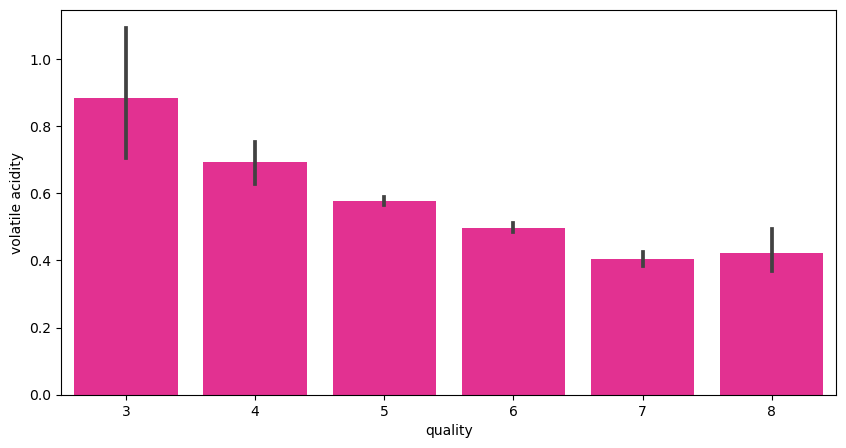

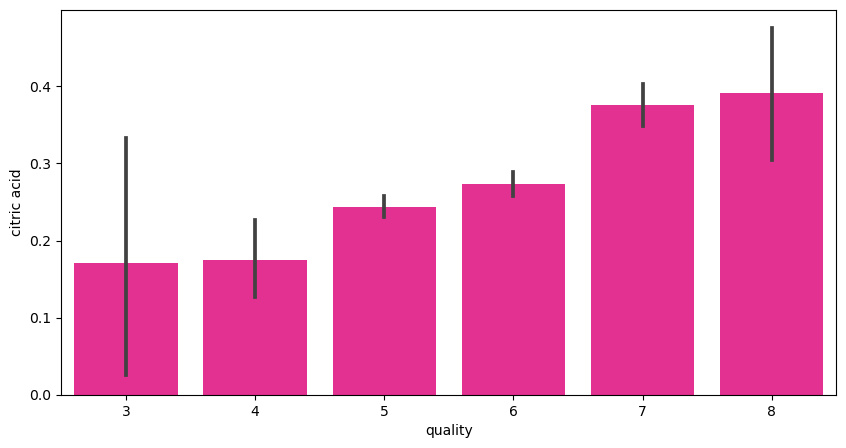

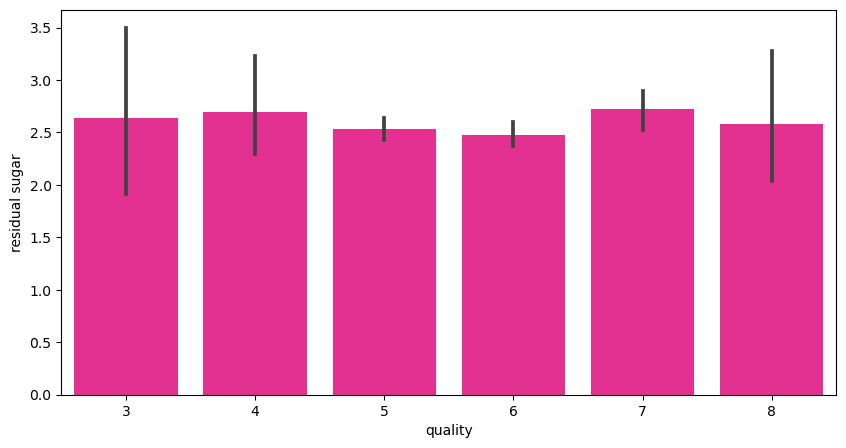

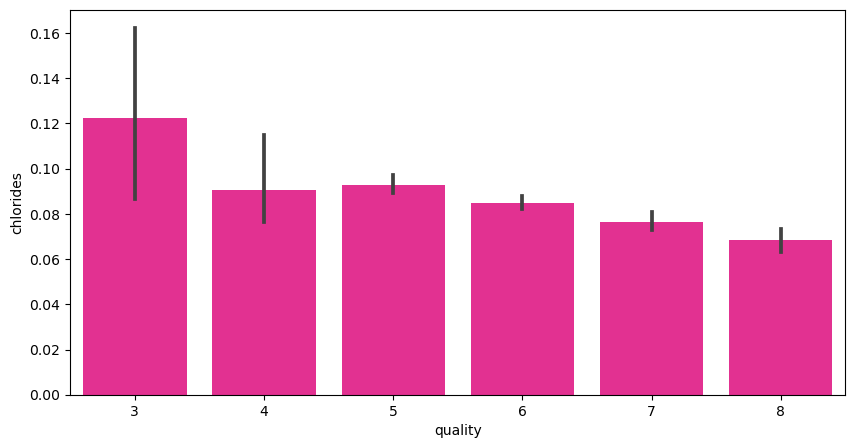

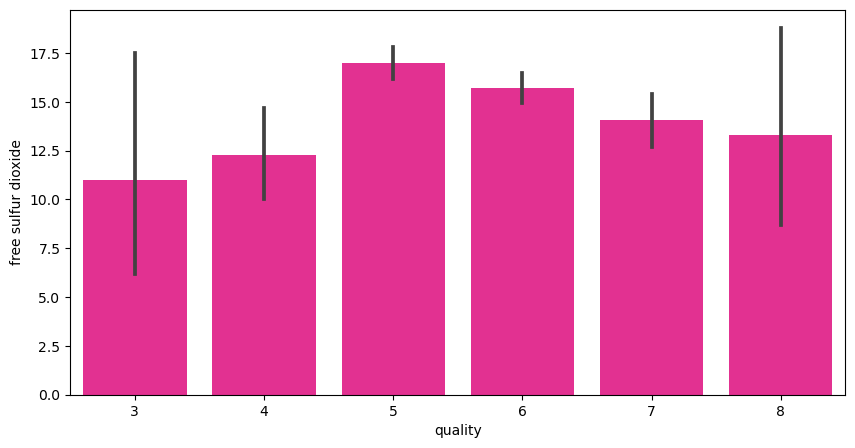

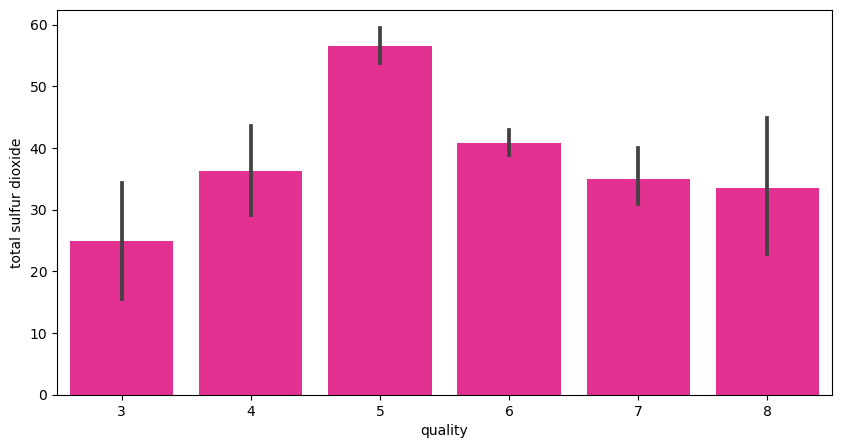

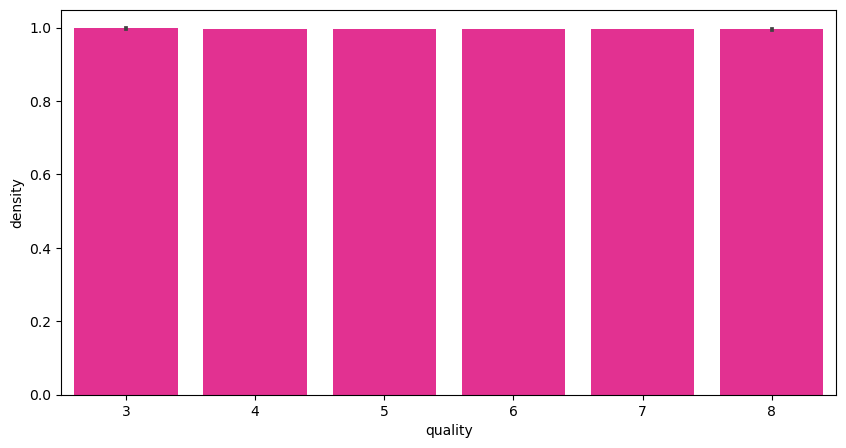

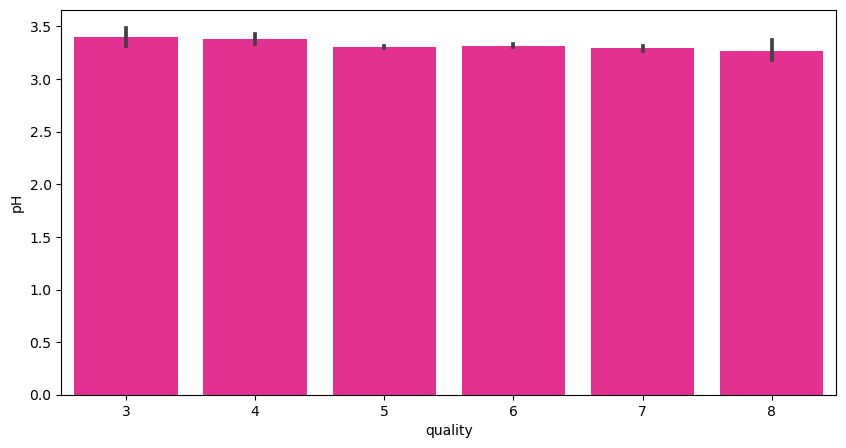

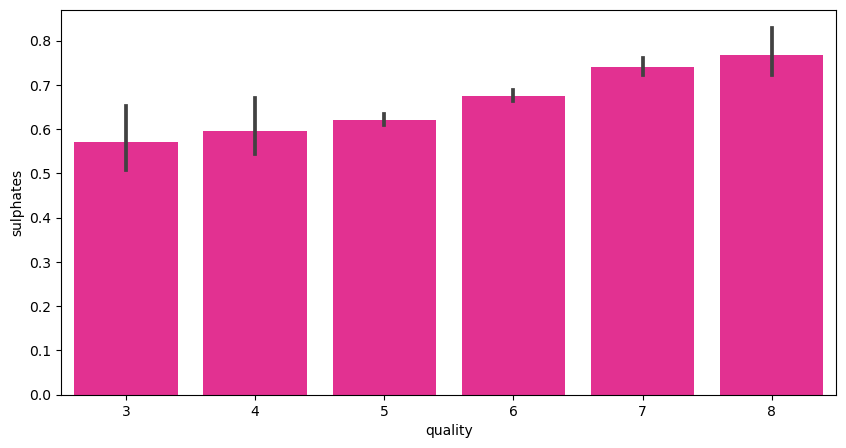

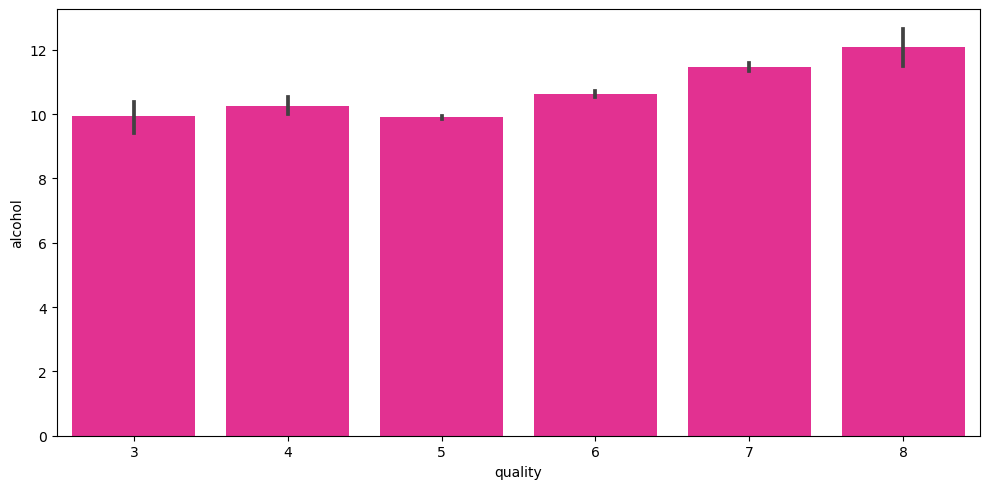

In [21]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)
for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

Observation:
1. fixed acidity vs quality - no fixed pattern
2. volatile acidity vs quality - there is a decreasing trend
3. citric acid vs quality - there is an increasing trend
4. residual sugar vs quality - no fixed pattern
5. chlorides vs quality - there is a decreasing trend
6. free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
7. total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
8. density vs quality - no pattern at all
9. pH vs quality - no pattern at all
10.sulphates vs quality - there is an increasing trend
11.alcohol vs quality - there is an increasing trend

So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role

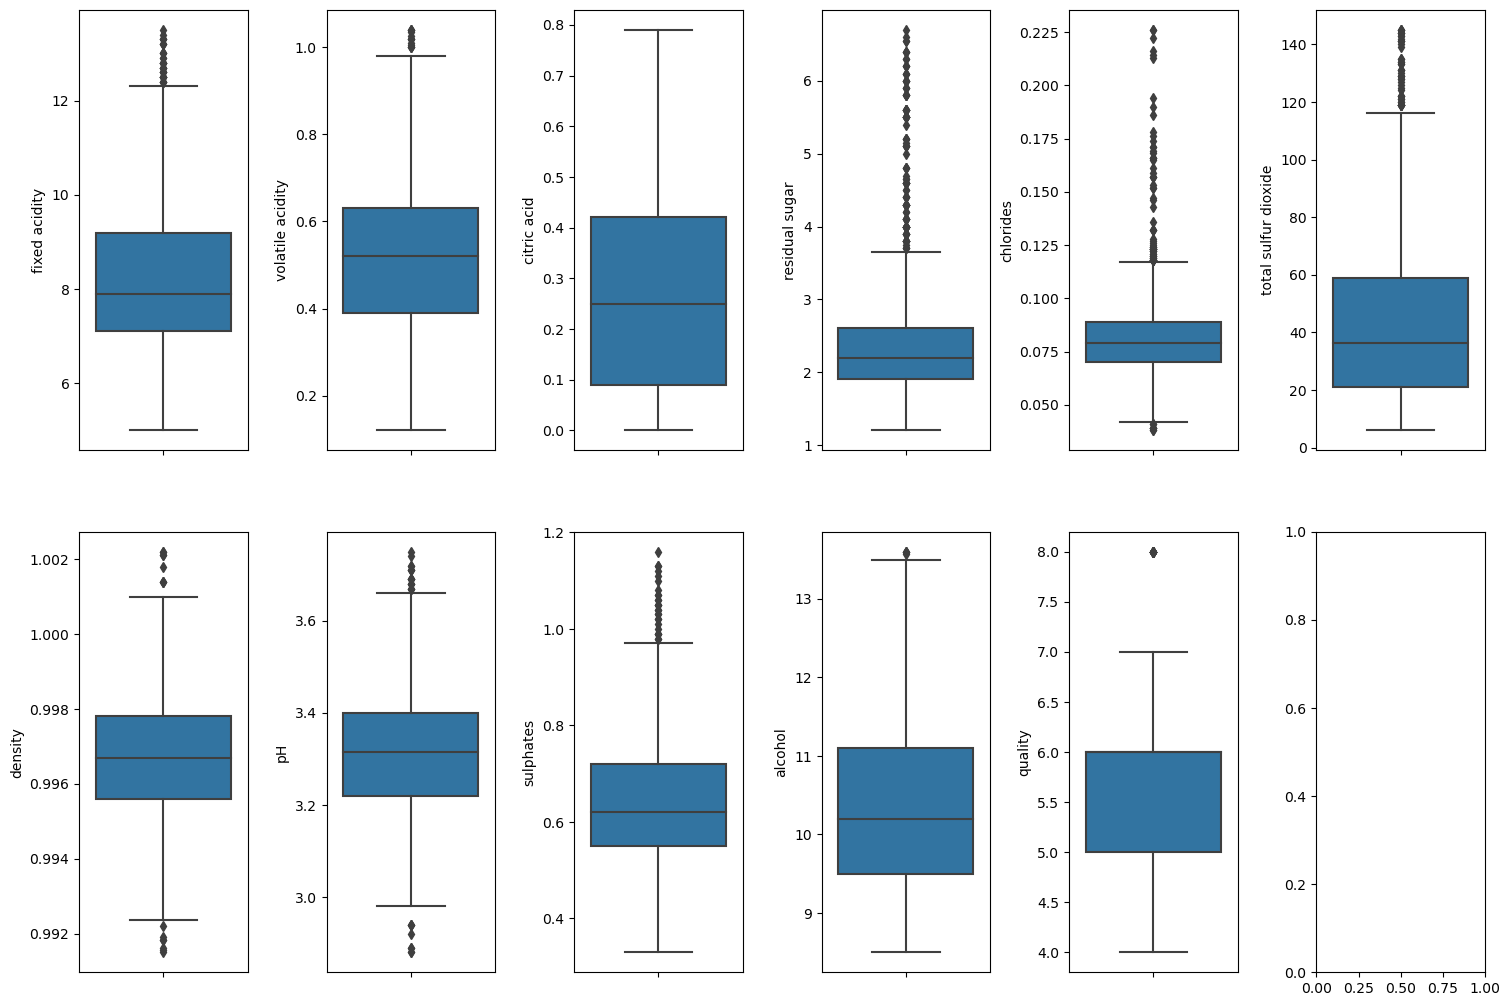

In [48]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

With the help of above boxplot we able to see the and outliers clearly.

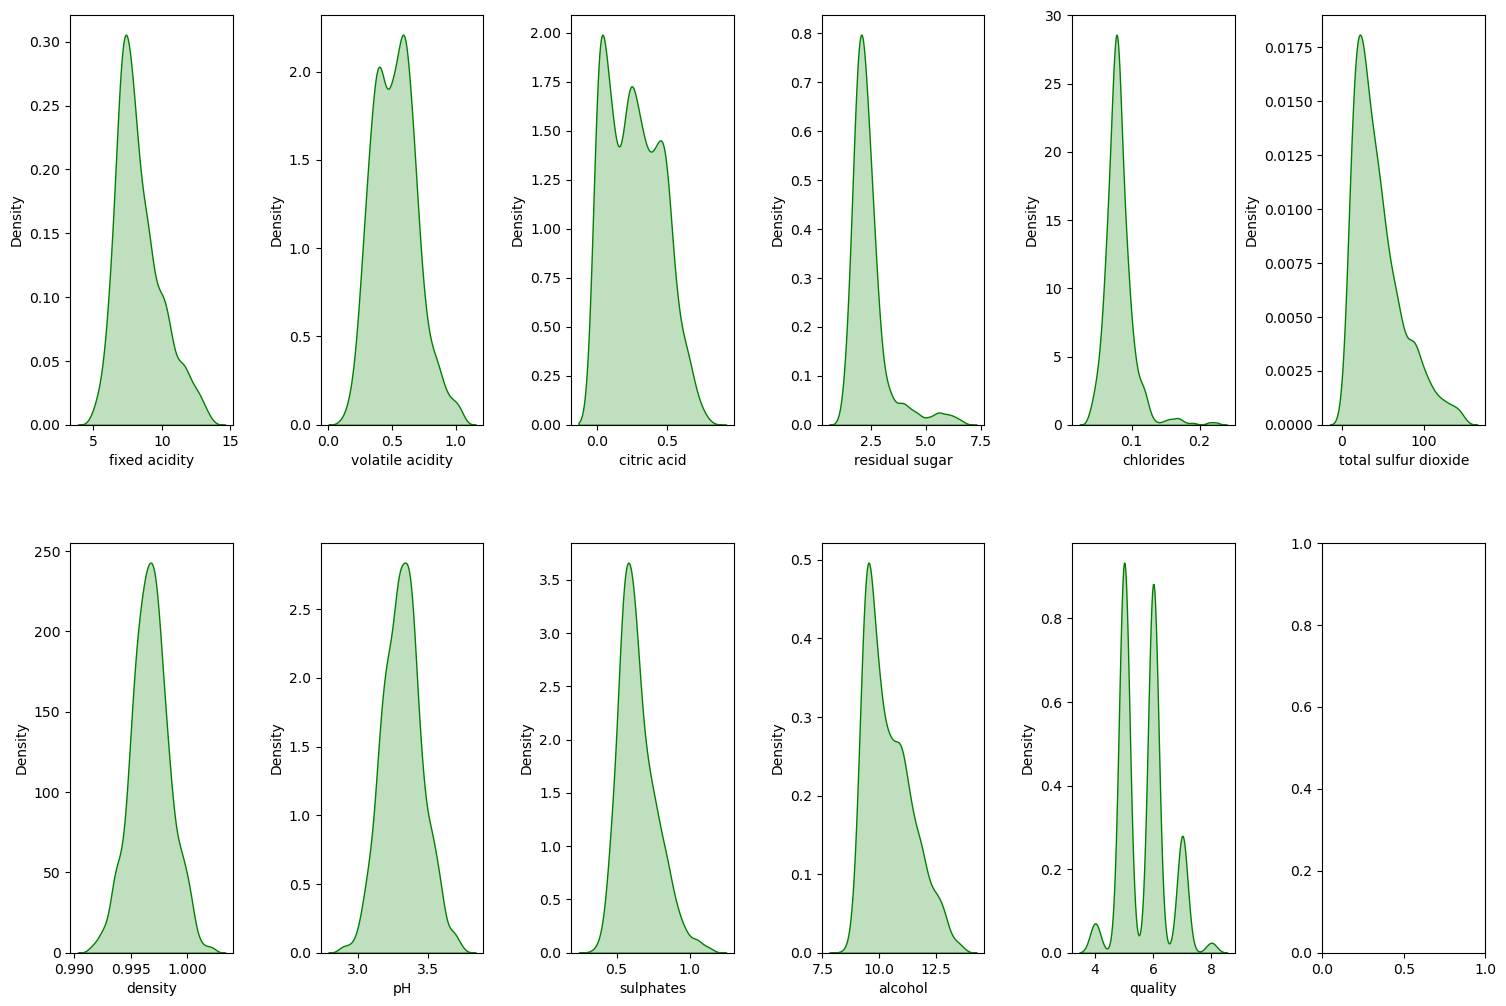

In [49]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve.

# Correlation using a Heatmap

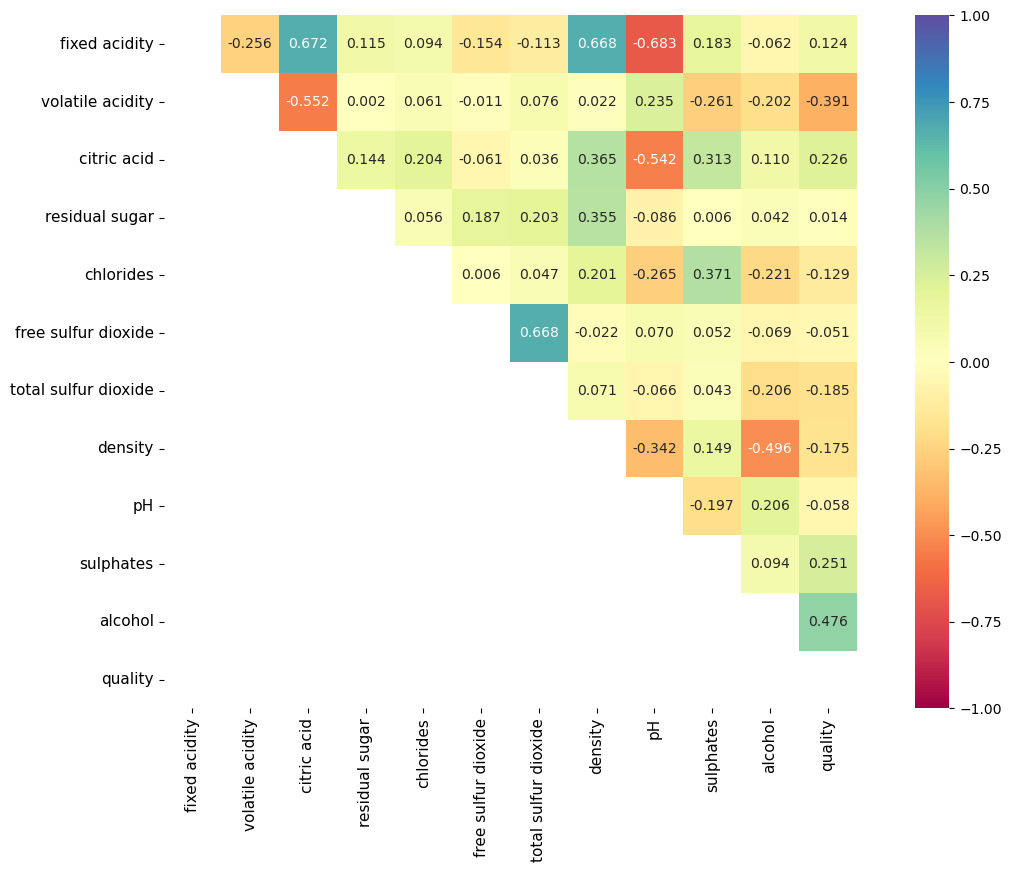

In [26]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

Observation:

1.i see that the above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns.

2.The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0.

3.Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable r, is exactly +1 or -1, then it is called perfect multicollinearity. But even if this r is close to -1 or +1 then one of the features should be removed from the model if at all possible.

4.Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1.




Dropping a column

In [27]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


I have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness

In [30]:
df.shape

(1464, 11)

In [31]:
# data loss after removing outlier 
data_loss=(1599-1464)/1599*100 
data_loss

8.442776735459661

In [32]:
# Data split into 2 variable x and y feature and target level
X = df.drop('quality', axis=1)
Y = df['quality']

In [33]:
df.shape

(1464, 11)

In [35]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [38]:
# adding samples to make all the categorical quality values same
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [39]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [41]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    0
3116    0
3117    0
3118    0
3119    0
Name: quality, Length: 3120, dtype: int64

I observed class is all for 0

In [47]:
# Displaying all the features except the label
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.654898,1.053916,-1.506610,-0.641258,-0.148425,-0.098312,0.841001,1.461011,-0.796242,-1.266124
1,-0.400754,2.077277,-1.506610,0.124192,1.062956,1.160654,0.230938,-0.783058,0.120654,-0.908480
2,-0.400754,1.395037,-1.300652,-0.203858,0.732579,0.664698,0.352951,-0.348722,-0.108570,-0.908480
3,1.759468,-1.333926,1.376801,-0.641258,-0.203487,0.893601,0.963014,-1.072615,-0.643426,-0.908480
4,-0.654898,1.053916,-1.506610,-0.641258,-0.148425,-0.098312,0.841001,1.461011,-0.796242,-1.266124
...,...,...,...,...,...,...,...,...,...,...
3115,-1.349617,1.596826,-0.900944,-1.099707,-1.705304,1.734613,-2.065393,1.326088,1.190366,1.583485
3116,-0.169475,0.042409,0.336276,0.025152,-0.179576,-0.750467,-2.204858,-0.817186,0.375854,1.865042
3117,0.480136,-0.667043,1.076209,-0.703345,-0.426713,-0.785021,-1.013964,-0.734135,0.180550,1.433158
3118,0.228925,-0.574186,0.567063,-0.671018,-0.578907,-0.923739,-0.656338,0.171061,0.169255,0.733387


Feature Scaling

In [44]:
# Displaying all the features after applying scaling technique to avoid bias output
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.654898,1.053916,-1.506610,-0.641258,-0.148425,-0.098312,0.841001,1.461011,-0.796242,-1.266124
1,-0.400754,2.077277,-1.506610,0.124192,1.062956,1.160654,0.230938,-0.783058,0.120654,-0.908480
2,-0.400754,1.395037,-1.300652,-0.203858,0.732579,0.664698,0.352951,-0.348722,-0.108570,-0.908480
3,1.759468,-1.333926,1.376801,-0.641258,-0.203487,0.893601,0.963014,-1.072615,-0.643426,-0.908480
4,-0.654898,1.053916,-1.506610,-0.641258,-0.148425,-0.098312,0.841001,1.461011,-0.796242,-1.266124
...,...,...,...,...,...,...,...,...,...,...
3115,-1.349617,1.596826,-0.900944,-1.099707,-1.705304,1.734613,-2.065393,1.326088,1.190366,1.583485
3116,-0.169475,0.042409,0.336276,0.025152,-0.179576,-0.750467,-2.204858,-0.817186,0.375854,1.865042
3117,0.480136,-0.667043,1.076209,-0.703345,-0.426713,-0.785021,-1.013964,-0.734135,0.180550,1.433158
3118,0.228925,-0.574186,0.567063,-0.671018,-0.578907,-0.923739,-0.656338,0.171061,0.169255,0.733387


Creating the training and testing data sets

In [46]:
#I am taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=21)

Machine Learning Model for Classification and Evaluation Metrics

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [60]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0